In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("data.csv", index_col="Date")

In [37]:
def window_input_output(input_length: int, output_length: int, data: pd.DataFrame) -> pd.DataFrame:
    df = data.copy()[["Close"]] 
    
    # Adjust the input columns to get the current day's close as the last input feature
    for i in range(1, input_length):
        df[f'x_{i}'] = df['Close'].shift(i)

    # Get the next 14 days for response values
    for j in range(output_length):
        df[f'y_{j}'] = df['Close'].shift(-j-1)
    
    df = df.dropna(axis=0)
    return df
window = 60
window_df = window_input_output(window, 14, data)

train/test split

In [39]:
from sklearn.model_selection import TimeSeriesSplit
df2 = window_df.copy()
# Separate features and target variables
X = df2.drop(columns=[f'y_{i}' for i in range(14)])
y = df2[[f'y_{i}' for i in range(14)]]
tscv = TimeSeriesSplit(n_splits=20, test_size=14) #model needs to predict up to two weeks into future
train1 = X.iloc[list(tscv.split(df))[0][0]]
test1 = y.iloc[list(tscv.split(df))[0][1]]
train2 = X.iloc[list(tscv.split(df))[1][0]]
test2 = y.iloc[list(tscv.split(df))[1][1]]
# Separate features and target variables
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train your model using X_train, y_train
    # Test your model using X_test, y_test


regression

In [54]:
from sklearn.linear_model import LinearRegression
lm_seq = LinearRegression()
lm_seq.fit(X_train, y_train)
lm_seq_pred = lm_seq.predict(X_test)

Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt_seq = DecisionTreeRegressor(random_state=42)
dt_seq.fit(X_train, y_train)
dt_seq_pred = dt_seq.predict(X_test)
print(dt_seq.get_depth())
#print(dt_seq.feature_importances_)


15
[8.41684620e-01 1.87685621e-04 1.66100189e-04 1.02752929e-03
 2.13058840e-04 2.46438570e-04 1.20580895e-04 2.06357588e-04
 7.83281382e-05 1.60080840e-04 6.10034371e-03 3.49023974e-04
 5.09540555e-04 2.08487063e-04 1.12217682e-03 3.96164354e-03
 1.84788659e-04 2.27811352e-04 7.87467704e-04 3.21786995e-04
 1.08814433e-04 1.63847758e-04 1.33319178e-04 4.27180289e-04
 1.39242547e-03 1.47154234e-03 1.25598697e-03 1.10777180e-04
 4.90416697e-04 6.50454263e-04 3.53205526e-05 4.50329082e-04
 1.83978555e-04 5.01950236e-04 1.08977923e-03 4.08405423e-03
 9.71554900e-04 1.37295120e-03 3.28760525e-04 2.39237907e-03
 1.11265585e-04 8.32208884e-04 1.88780056e-04 2.30906819e-04
 9.17520395e-04 1.45790017e-03 1.06592605e-01 8.21776949e-04
 1.61327320e-03 6.83516821e-04 5.77646417e-03 3.83875805e-04
 1.05819839e-03 2.68625060e-04 5.76396885e-04 2.01004111e-04
 3.07028454e-04 4.41269580e-04 1.50733942e-04 1.90697730e-03]


In [41]:
#window_df.to_csv("window_df.csv")

Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Train a multi-output random forest regressor
rf_seq = RandomForestRegressor(n_estimators=100, random_state=42)
rf_seq.fit(X_train, y_train)

# Predict on the test set
rf_seq_pred = rf_seq.predict(X_test)

,rf,dt
0,323.119562,577.007429
1,470.154834,502.722035
2,712.758121,516.848178
3,844.779934,719.884631
4,955.430378,662.784460
5,980.802925,969.869874
6,991.808185,1165.419088
7,926.202669,1317.411522
8,992.682241,1411.239306
9,940.827340,1342.328167


Chained Regressors

In [65]:
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR
# define base model
svr_chain = RegressorChain(LinearSVR())
svr_chain.fit(X_train, y_train)
svr_chain_pred = svr_chain.predict(X_test)
#lm_seq = 
#lm_seq.fit(X_train, y_train)
#lm_seq_pred = lm_seq.predict(X_test)
lm_chain = RegressorChain(LinearRegression())
lm_chain.fit(X_train, y_train)
lm_chain_pred = lm_chain.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/V

visualisation

            rf           dt           lm    chain_svr     chain_lm
0   323.119562   577.007429   105.724372    84.594631   105.724372
1   470.154834   502.722035   196.140138   128.942463   196.140138
2   712.758121   516.848178   339.587578   438.832602   339.587578
3   844.779934   719.884631   448.093091  1039.632911   448.093091
4   955.430378   662.784460   540.069145   601.403995   540.069145
5   980.802925   969.869874   662.497408   452.982231   662.497408
6   991.808185  1165.419088   754.718625  1599.822800   754.718625
7   926.202669  1317.411522   992.627681  3277.910934   992.627681
8   992.682241  1411.239306  1076.595823  3515.850681  1076.595823
9   940.827340  1342.328167  1273.876629  4501.978948  1273.876629
10  783.369752  1091.061471  1343.888958  7167.345722  1343.888958
11  619.250086   929.423257  1405.753450  9003.369098  1405.753450
12  477.719353   907.040467  1467.649754  8791.521656  1467.649754
13  333.819768   740.940516  1334.570140  7450.885301  1334.57

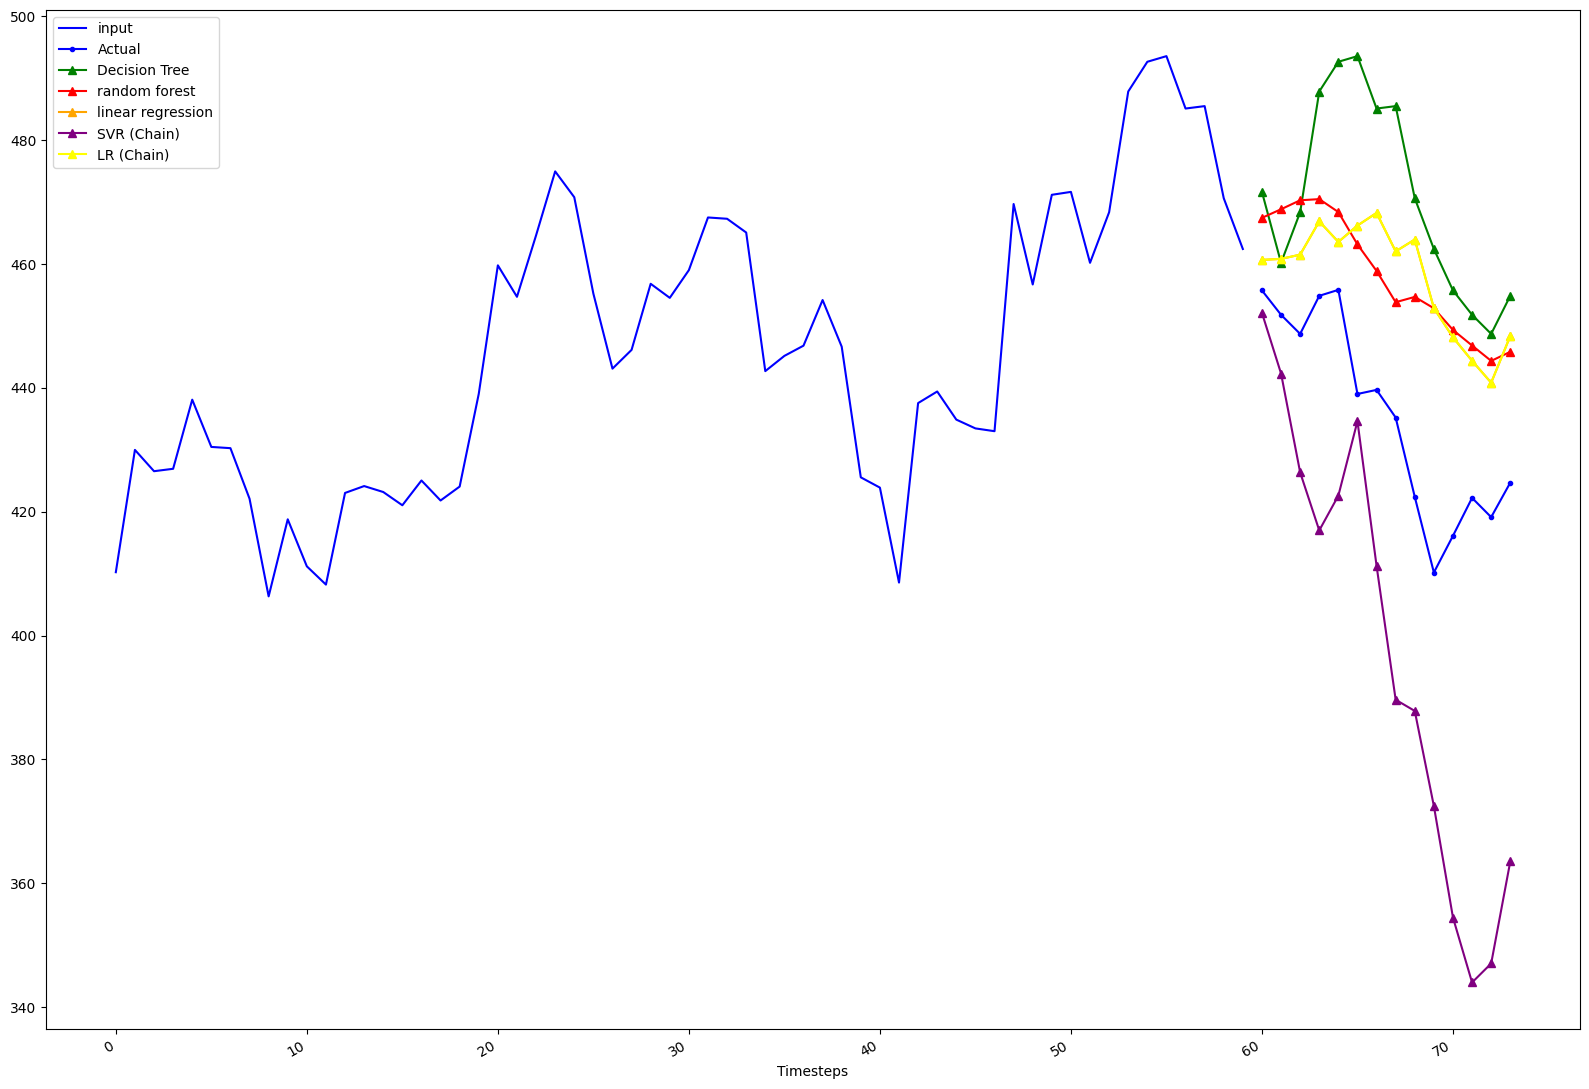

In [68]:
# Calculate MSE for each output column
mse_scores_rf = [mean_squared_error(y_test.iloc[:, i], rf_seq_pred[:, i]) for i in range(y_test.shape[1])]
mse_scores_dt = [mean_squared_error(y_test.iloc[:, i], dt_seq_pred[:, i]) for i in range(y_test.shape[1])]
mse_scores_lm = [mean_squared_error(y_test.iloc[:, i], lm_seq_pred[:, i]) for i in range(y_test.shape[1])]
mse_scores_svr_chain = [mean_squared_error(y_test.iloc[:, i], svr_chain_pred[:, i]) for i in range(y_test.shape[1])]
mse_scores_lm_chain = [mean_squared_error(y_test.iloc[:, i], lm_chain_pred[:, i]) for i in range(y_test.shape[1])]

mse_df = pd.DataFrame({
    'rf': mse_scores_rf,
    'dt': mse_scores_dt,
    'lm': mse_scores_lm,
    'chain_svr': mse_scores_svr_chain,
    'chain_lm': mse_scores_lm_chain
})
print(mse_df)
#visualise predictions
fig, ax = plt.subplots(figsize=(16, 11))
t= 4
ax.plot(np.arange(window-1, -1, -1), X_test.iloc[t], 'b-', label='input')
ax.plot(np.arange(window, window+14, 1), y_test.iloc[t], marker='.', color='blue', label='Actual')
ax.plot(np.arange(window, window+14, 1), dt_seq_pred[t], marker='^', color='green', label='Decision Tree')
ax.plot(np.arange(window, window+14, 1), rf_seq_pred[t], marker='^', color='red', label='random forest')
ax.plot(np.arange(window, window+14, 1), lm_seq_pred[t], marker='^', color='orange', label='linear regression')
ax.plot(np.arange(window, window+14, 1), svr_chain_pred[t], marker='^', color='purple', label='SVR (Chain)')
ax.plot(np.arange(window, window+14, 1), lm_chain_pred[t], marker='^', color='yellow', label='LR (Chain)')

ax.set_xlabel('Timesteps')
plt.legend()

fig.autofmt_xdate()
plt.tight_layout()


In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plot_time_series_splits_separately(X_train, X_test, y_train, y_test, model_predictions, model_name):
    n_splits = len(model_predictions)
    fig, axes = plt.subplots(n_splits, 1, figsize=(16, 5*n_splits))
    
    for i, ax in enumerate(axes):
        # Combine train and test for continuous line
        combined_x = np.concatenate((X_train[i], X_test[i]))
        combined_y = np.concatenate((y_train[i], y_test[i]))
        
        # Plotting
        ax.plot(np.arange(len(X_train[i])), y_train[i], 'b-', label='Training Data')
        ax.plot(np.arange(len(X_train[i]), len(combined_x)), y_test[i], 'g-', label='Testing Data')
        ax.plot(np.arange(len(X_train[i]), len(combined_x)), model_predictions[i], 'r-', marker='^', label=f'{model_name} Predictions', alpha=0.7)
        
        ax.set_title(f"Test Split {i+1}")
        ax.set_xlabel('Sequence')
        ax.set_ylabel('Value')
        ax.legend(loc='upper left')
        
    plt.tight_layout()
    plt.show()

# Sample usage
# plot_time_series_splits_separately(X_train_list, X_test_list, y_train_list, y_test_list, model_predictions, 'Your Model Name')

model_predictions = []  # Store your model predictions for each test split here
X_train_list = []  # Store the X_train values for each split
X_test_list = []   # Store the X_test values for each split
y_train_list = []  # Store the y_train values for each split
y_test_list = []   # Store the y_test values for each split

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    predictions = dt_seq.predict(X_test)

    model_predictions.append(predictions)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
plot_time_series_splits_separately(X_train_list, X_test_list, y_train_list, y_test_list, model_predictions, 'Your Model Name')

/var/folders/0t/661fss3n2h53fsp71dq_blsm0000gn/T/ipykernel_38576/1087127999.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


KeyboardInterrupt: 